In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [109]:
dataset = pd.read_csv('/content/drive/MyDrive/8th Sem/Machine learning/Exp 7: L1- Regularization and L2- Regularization(Lasso Regression and Ridge Regression)/housing.csv')
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [110]:
x = dataset[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
y = dataset['price']

In [111]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 1/3, random_state = 0 )

In [112]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, xtrain, ytrain, scoring="neg_mean_squared_error", cv = cv))
    return rmse

#L1 Regularization - Lasso Regression

In [113]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
lasso.fit(xtrain, ytrain)

rmse = rmse_cv(lasso)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 246504.46437894017, std: 7361.394292242978


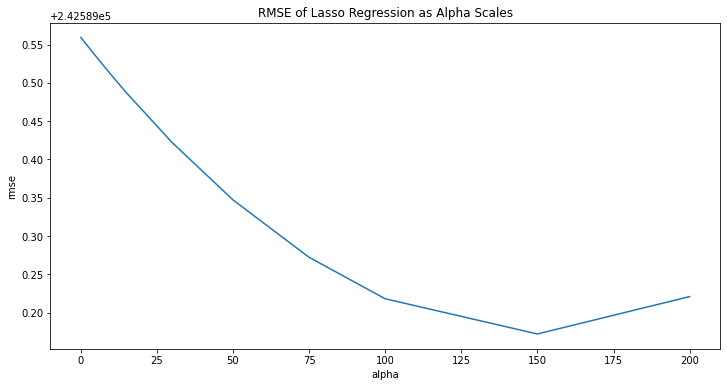

In [114]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12.0, 6.0)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 150, 200]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

cv_lasso.plot(title = "RMSE of Lasso Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [115]:
optimalLassoAlpha = cv_lasso[cv_lasso == cv_lasso.min()].index.values[0]
print("Optimal Lasso alpha: {}".format(optimalLassoAlpha))

lassoModel = Lasso(alpha = optimalLassoAlpha)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))


Optimal Lasso alpha: 150.0
RMSE estimate: 242589.17206782018, std: 7077.506194549395


#L2 Regularization - Ridge

In [116]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10, 
              solver='cholesky', 
              tol=0.0001, 
              random_state=42)
ridge.fit(xtrain, ytrain)
pred = ridge.predict(xtest)

rmse = rmse_cv(ridge)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 242589.1450097927, std: 7071.025948335795


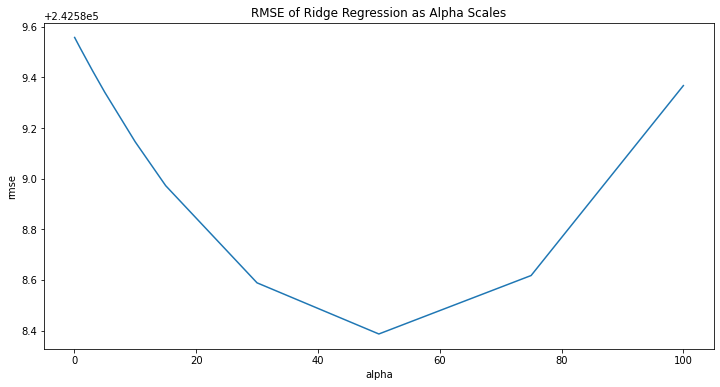

In [117]:
rcParams['figure.figsize'] = (12.0, 6.0)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [118]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]
print("Optimal ridge alpha: {}".format(optimalRidgeAlpha))

ridgeModel = Ridge(alpha = optimalRidgeAlpha)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

Optimal ridge alpha: 50.0
RMSE estimate: 242588.3866768141, std: 7076.169799598027
